Libraries

In [2]:
pip install imbalanced-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Data read and analyze

In [4]:
df = pd.read_csv('nasa.csv')
df.shape

(4687, 40)

In [5]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [6]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

To check missing values

In [8]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

As there is no mising value in th dataframe

In [9]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:")
print(numerical_cols)

Numerical columns:
Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'],
      dtype='object')


In [10]:
# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_cols)


Categorical columns:
Index(['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date',
       'Equinox'],
      dtype='object')


Now do some visualizations to analyze the dataframe

1-Histograms

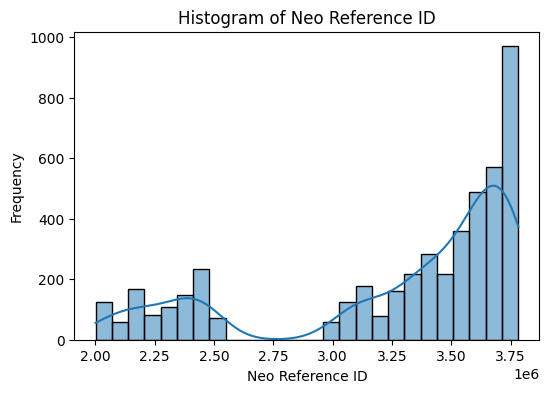

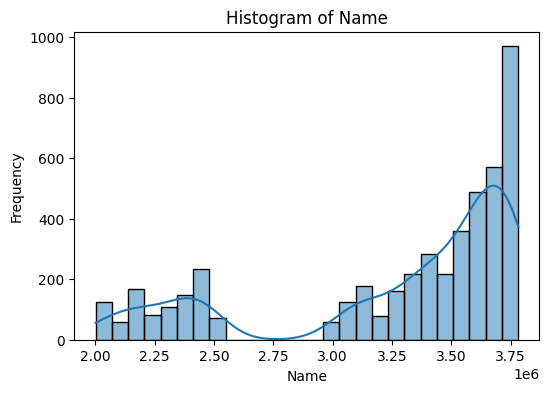

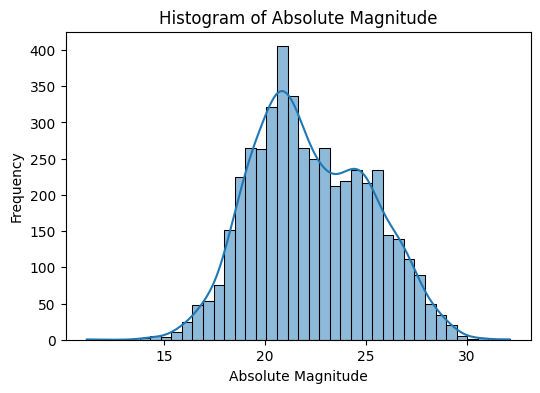

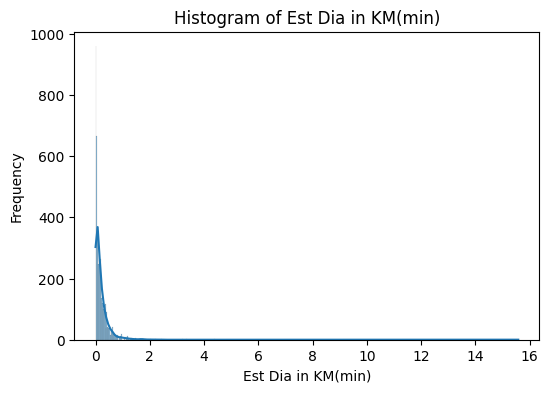

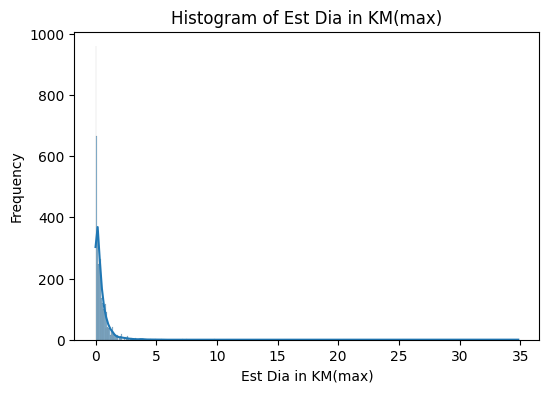

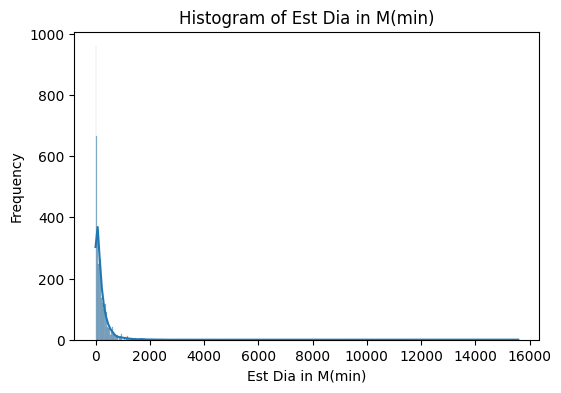

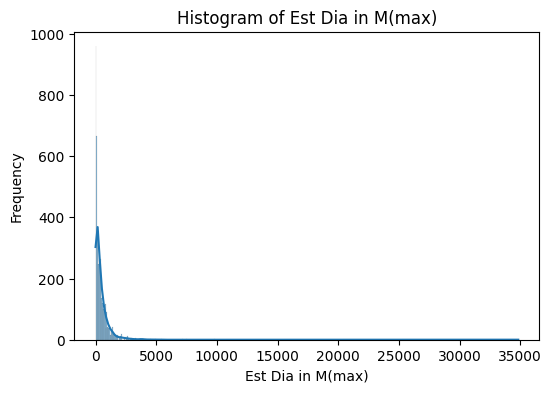

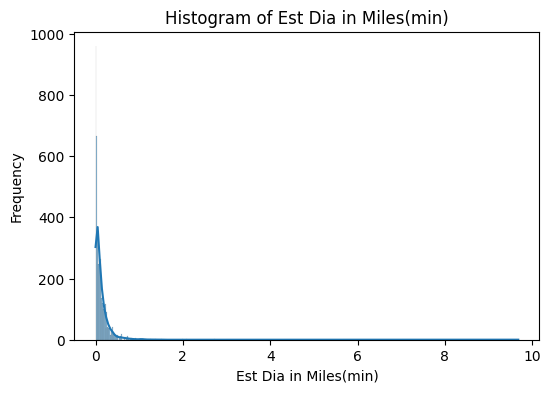

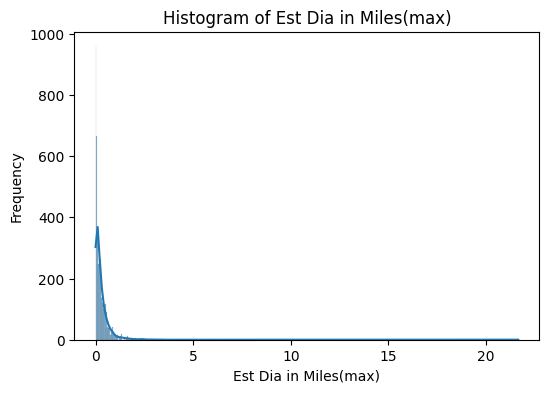

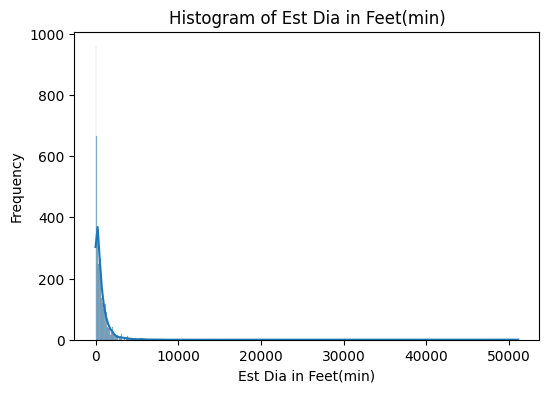

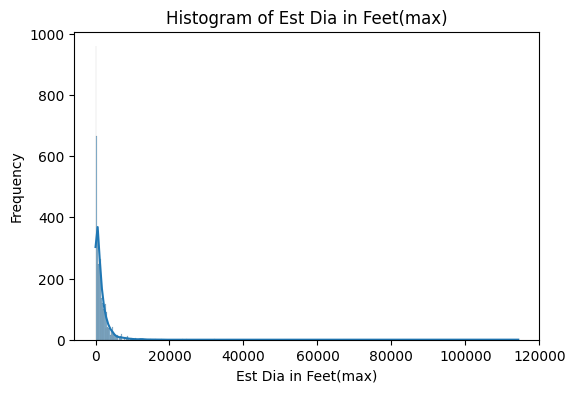

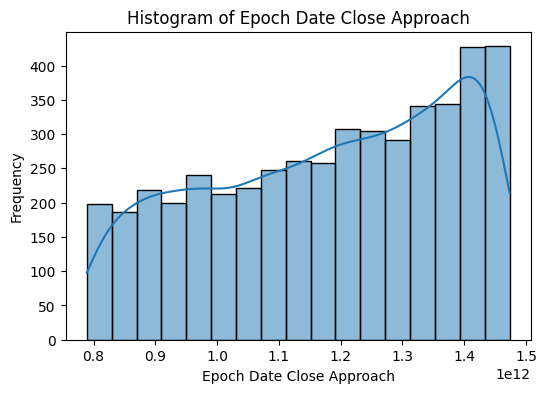

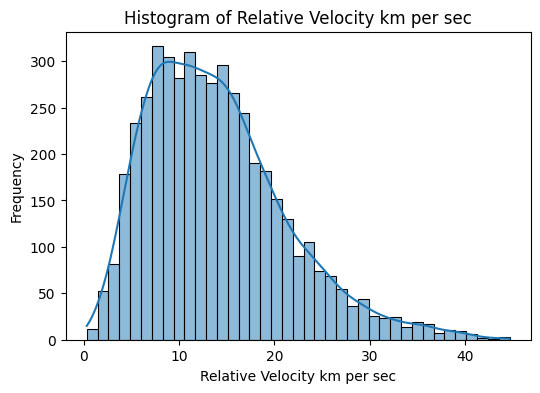

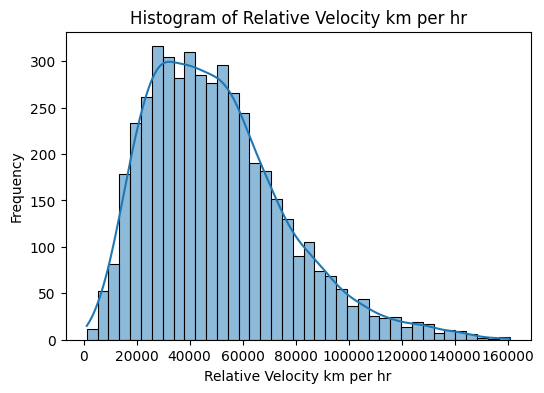

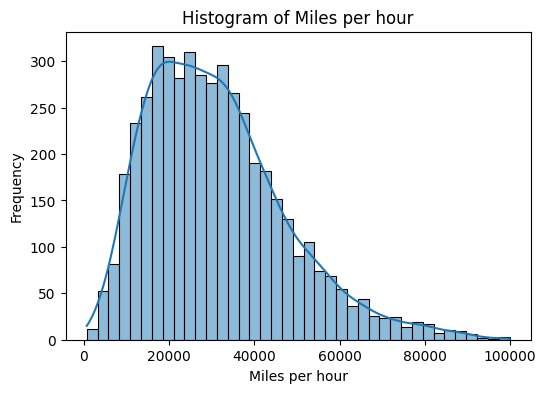

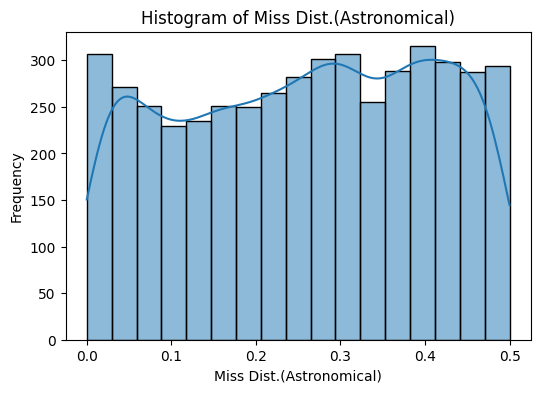

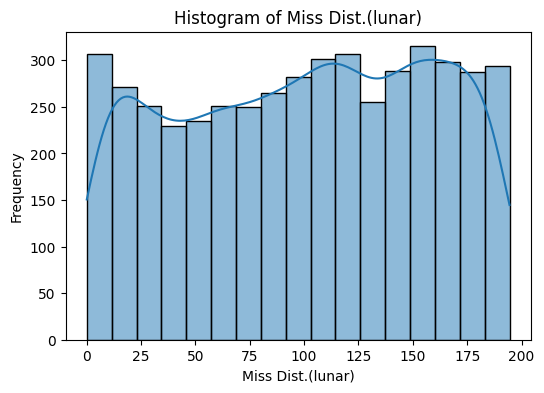

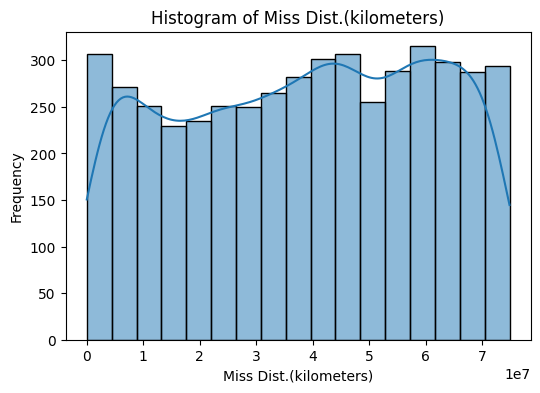

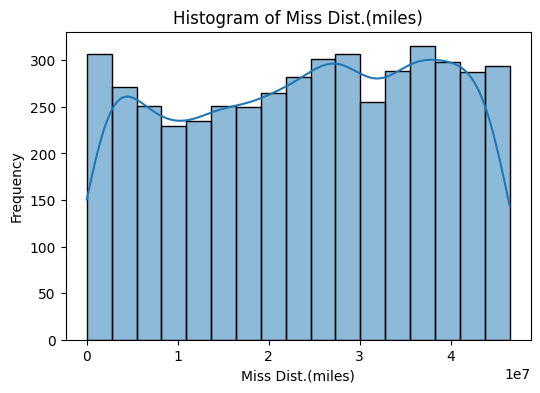

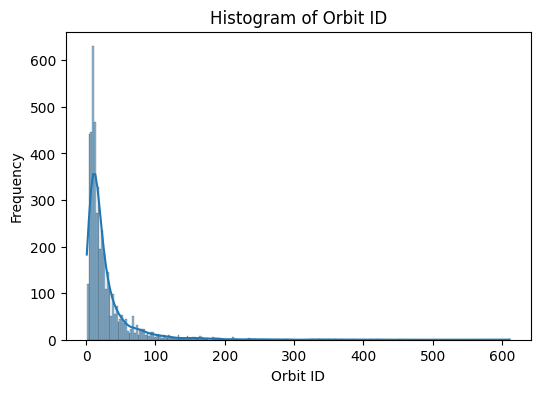

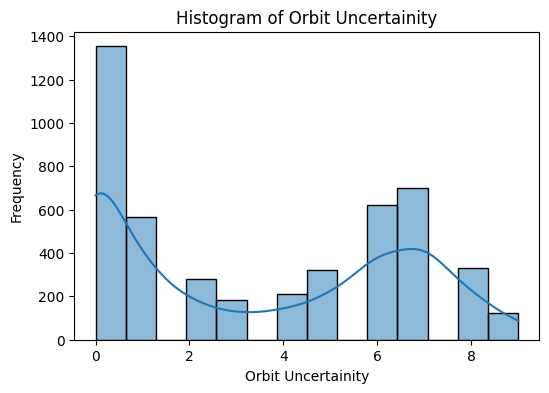

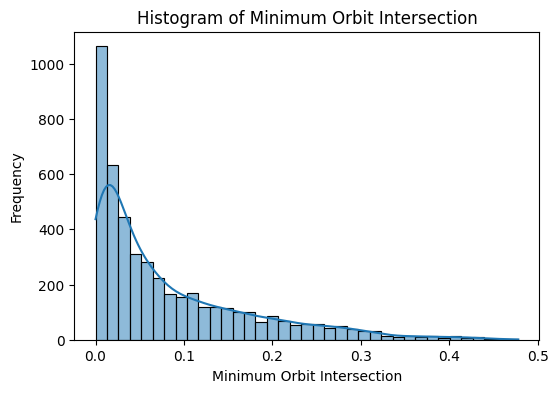

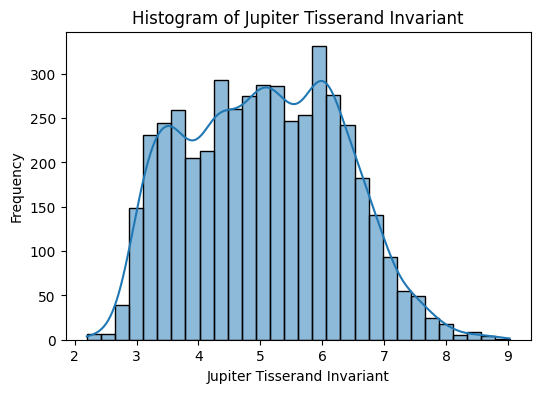

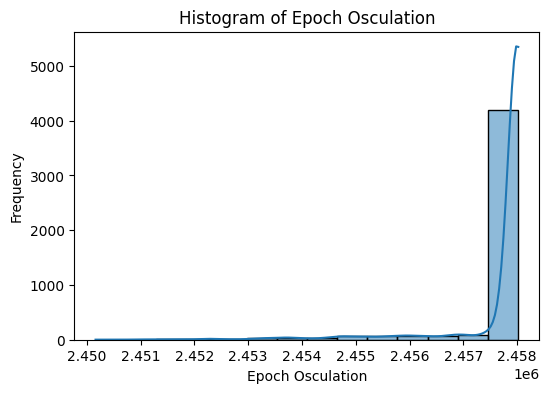

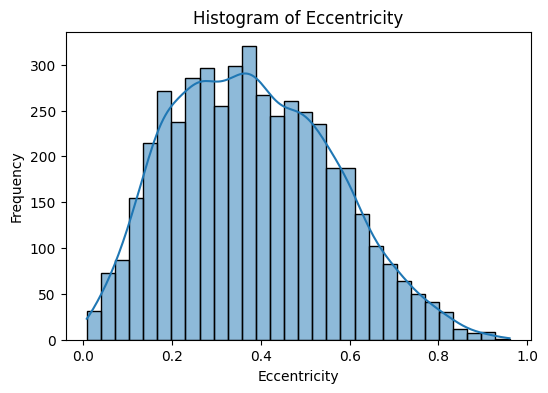

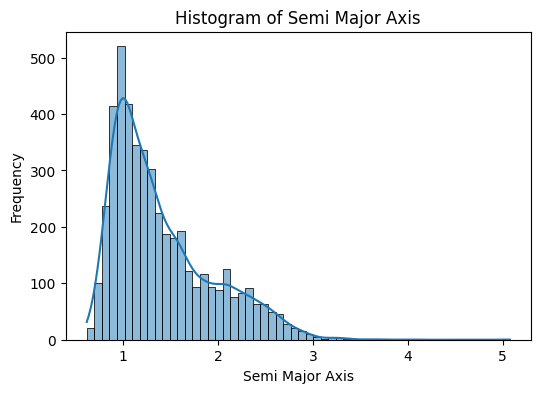

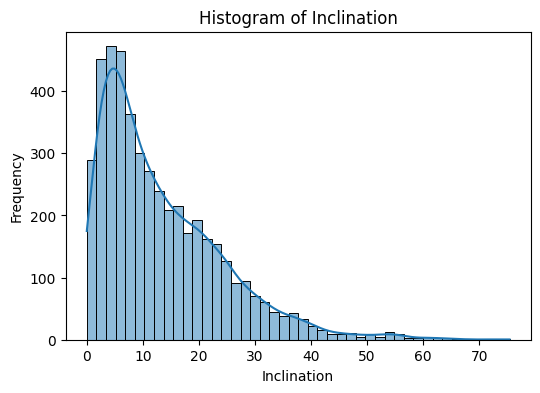

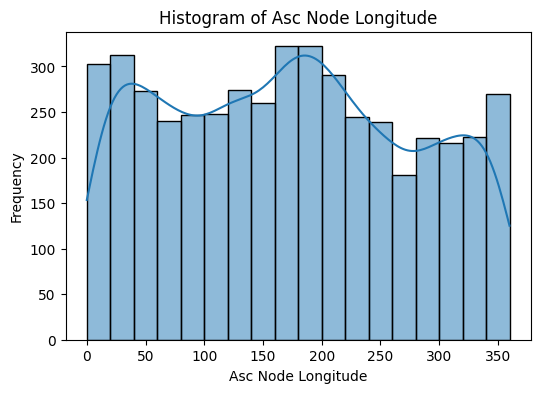

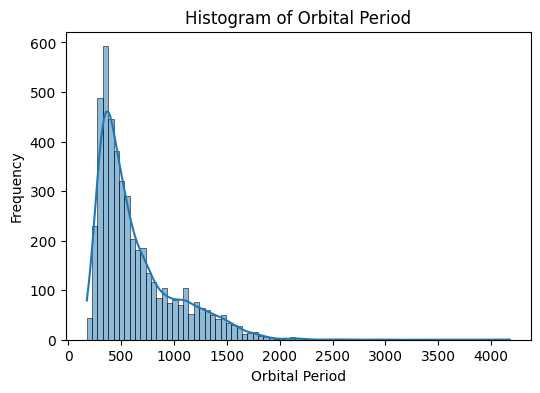

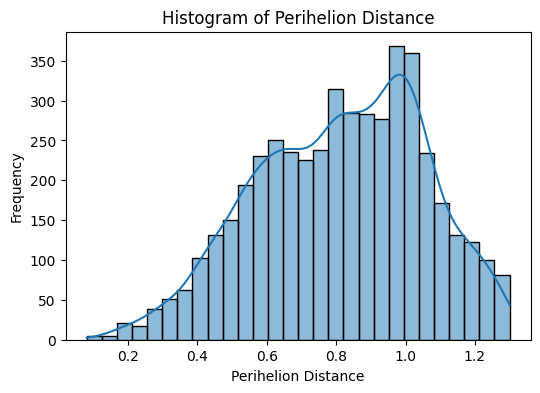

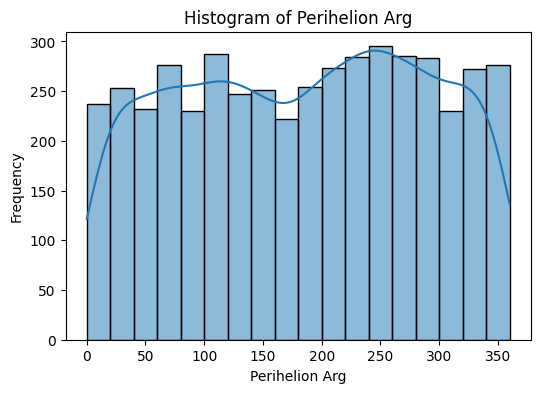

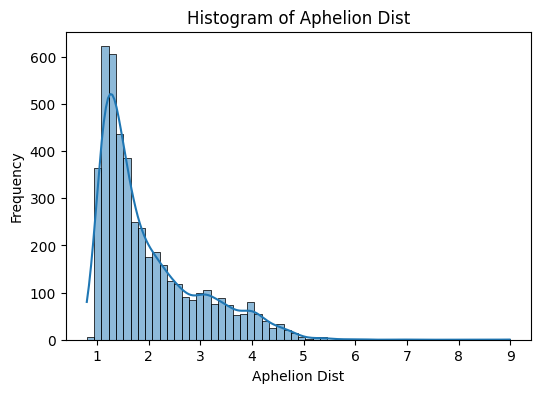

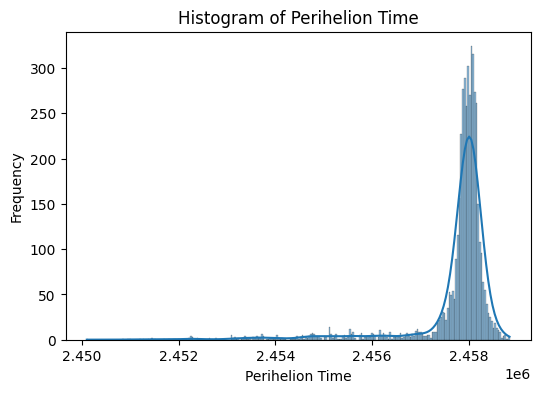

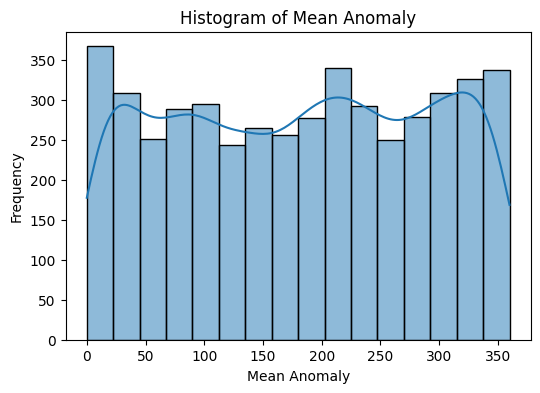

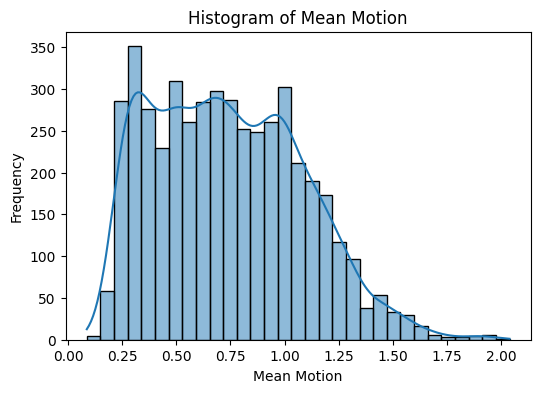

In [11]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Target variable(boolean) into numerical

In [12]:
# Convert 'Hazardous' column to numerical (0 and 1)
df['Hazardous'] = df['Hazardous'].astype(int)

Convert object columns to numerical using LabelEncoder

In [13]:
# Iterate over each column
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

5- heat map

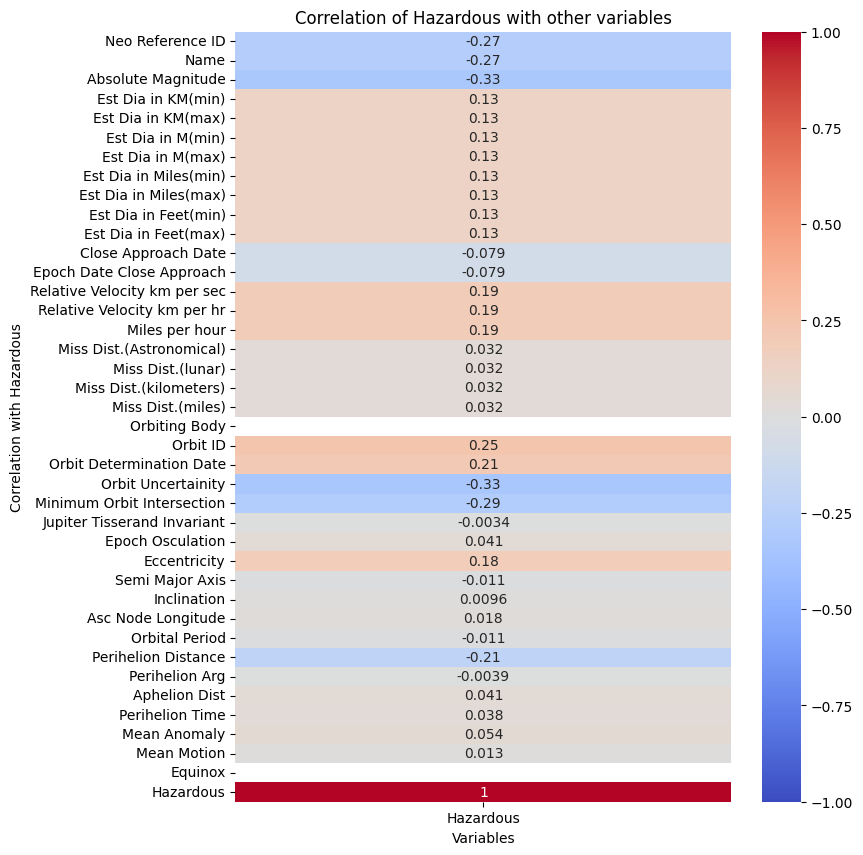

In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Focus on the 'Hazardous' correlations with other variables
hazardous_correlation = correlation_matrix[['Hazardous']]

# Create a figure to display the heatmap
plt.figure(figsize=(8, 10))

# Generate a heatmap
sns.heatmap(hazardous_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

# Set title and labels
plt.title('Correlation of Hazardous with other variables')
plt.xlabel('Variables')
plt.ylabel('Correlation with Hazardous')

# Show the plot
plt.show()

Now we will do feature extraction by some techniques

By droping columns which has less correlation with target variable "Hazardous"

In [15]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_numerical = df[numerical_cols].corrwith(df['Hazardous'])

# Filter out features with correlation less than 0
selected_features = correlation_numerical[correlation_numerical >= 0].index

# Create a new DataFrame with selected features and target variable
selected_df = df[selected_features.union(['Hazardous'])]

print("Selected Features with correlation greater than or equal to 0 with the target:")
print(selected_features)

Selected Features with correlation greater than or equal to 0 with the target:
Index(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)',
       'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Relative Velocity km per sec', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Determination Date', 'Epoch Osculation', 'Eccentricity',
       'Inclination', 'Asc Node Longitude', 'Aphelion Dist', 'Perihelion Time',
       'Mean Anomaly', 'Mean Motion', 'Hazardous'],
      dtype='object')


Now We are caculation feature importance

In [16]:
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']

# Encoding categorical variables if any
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))

# Create a DataFrame and sort by importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Define the minimum number of features you want to include
min_num_features = 20

# Find the threshold importance value for the top min_num_features features
if len(importance_df) > min_num_features:
    threshold = importance_df.nlargest(min_num_features, 'Importance')['Importance'].min()
else:
    threshold = 0  # In case there are fewer features than min_num_features

# Filter the original dataset with selected features plus target
selected_features = importance_df[importance_df['Importance'] >= threshold]['Feature']
selected_X = df[selected_features]
selected_df = pd.concat([selected_X, y], axis=1)

print("Selected Features based on Importance:")
print(selected_features)

Selected Features based on Importance:
24    Minimum Orbit Intersection
2             Absolute Magnitude
8          Est Dia in Miles(max)
10          Est Dia in Feet(max)
32           Perihelion Distance
6              Est Dia in M(max)
29                   Inclination
4             Est Dia in KM(max)
9           Est Dia in Feet(min)
5              Est Dia in M(min)
3             Est Dia in KM(min)
16      Miss Dist.(Astronomical)
7          Est Dia in Miles(min)
19             Miss Dist.(miles)
17             Miss Dist.(lunar)
18        Miss Dist.(kilometers)
21                      Orbit ID
33                Perihelion Arg
0               Neo Reference ID
34                 Aphelion Dist
Name: Feature, dtype: object


In [17]:
selected_df

,Minimum Orbit Intersection,Absolute Magnitude,Est Dia in Miles(max),Est Dia in Feet(max),Perihelion Distance,Est Dia in M(max),Inclination,Est Dia in KM(max),Est Dia in Feet(min),Est Dia in M(min),...,Miss Dist.(Astronomical),Est Dia in Miles(min),Miss Dist.(miles),Miss Dist.(lunar),Miss Dist.(kilometers),Orbit ID,Perihelion Arg,Neo Reference ID,Aphelion Dist,Hazardous
0,0.025282,21.600,0.176763,933.308089,0.808259,284.472297,6.025981,0.284472,417.388066,127.219879,...,0.419483,0.079051,3.899334e+07,163.178711,6.275369e+07,17,57.257470,3703080,2.005764,1
1,0.186935,21.300,0.202951,1071.581063,0.718200,326.617897,28.412996,0.326618,479.225620,146.067964,...,0.383014,0.090762,3.560342e+07,148.992630,5.729815e+07,21,313.091975,3723955,1.497352,0
2,0.043058,20.300,0.321655,1698.341531,0.950791,517.654482,4.237961,0.517654,759.521423,231.502122,...,0.050956,0.143849,4.736658e+06,19.821890,7.622912e+06,22,248.415038,2446862,1.966857,1
3,0.005512,27.400,0.012229,64.569144,0.983902,19.680675,7.905894,0.019681,28.876199,8.801465,...,0.285322,0.005469,2.652237e+07,110.990387,4.268362e+07,7,18.707701,3092506,1.527904,0
4,0.034798,21.600,0.176763,933.308089,0.967687,284.472297,16.793382,0.284472,417.388066,127.219879,...,0.407832,0.079051,3.791037e+07,158.646713,6.101082e+07,25,158.263596,3514799,1.483543,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.019777,23.900,0.061290,323.612307,0.741558,98.637028,39.880491,0.098637,144.723824,44.111820,...,0.041361,0.027410,3.844741e+06,16.089413,6.187511e+06,4,276.395697,3759007,1.581299,0
4683,0.006451,28.200,0.008460,44.670934,0.996434,13.615700,5.360249,0.013616,19.977449,6.089126,...,0.006469,0.003784,6.013211e+05,2.516399,9.677324e+05,2,42.111064,3759295,1.153835,0
4684,0.059972,22.700,0.106510,562.373736,0.965760,171.411509,4.405467,0.171412,251.501180,76.657557,...,0.061009,0.047633,5.671115e+06,23.732393,9.126775e+06,17,274.692712,3759714,2.090708,0
4685,0.177510,21.800,0.161210,851.187094,1.185467,259.441818,21.080244,0.259442,380.662441,116.025908,...,0.260760,0.072095,2.423912e+07,101.435493,3.900908e+07,6,180.346090,3759720,1.787733,0


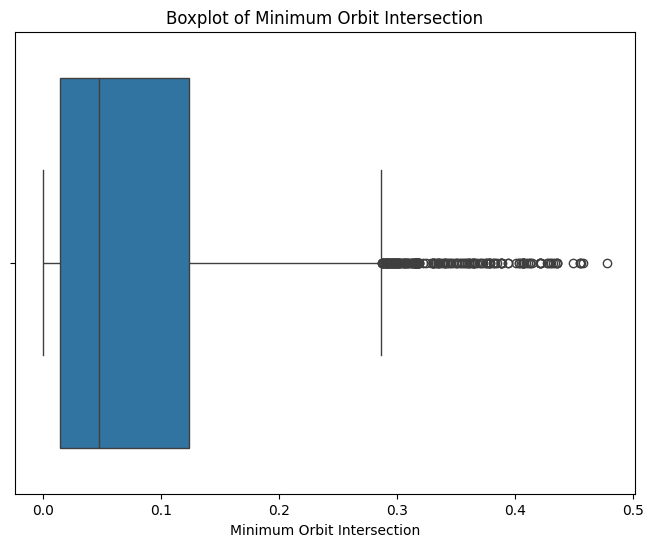

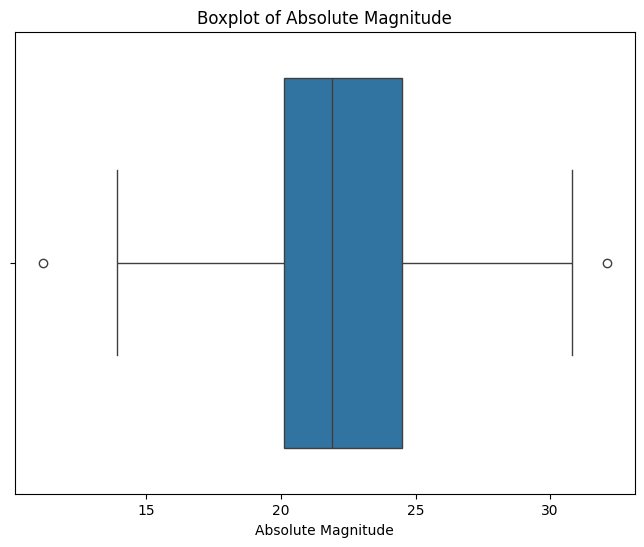

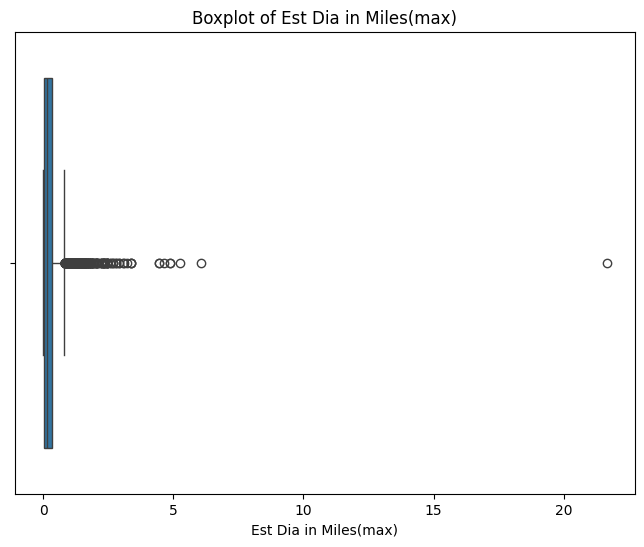

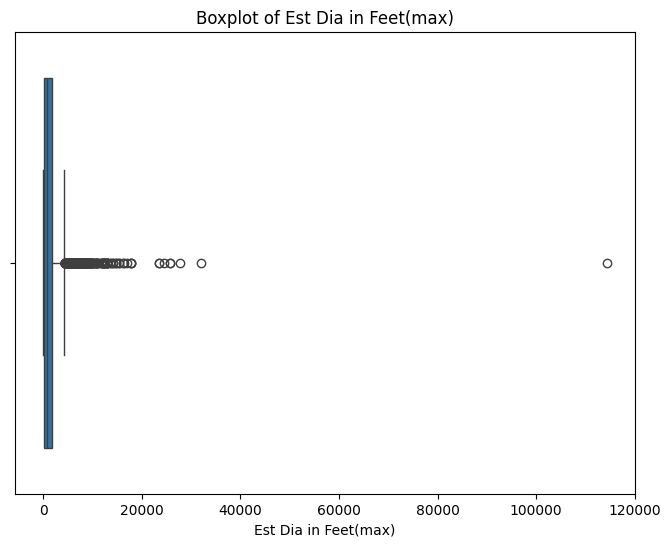

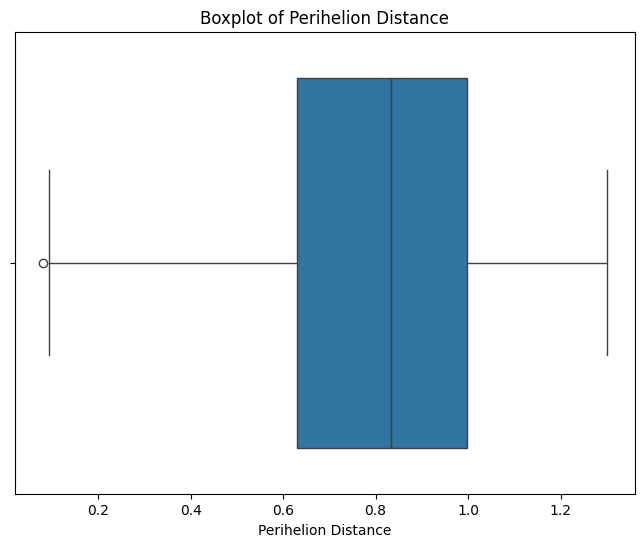

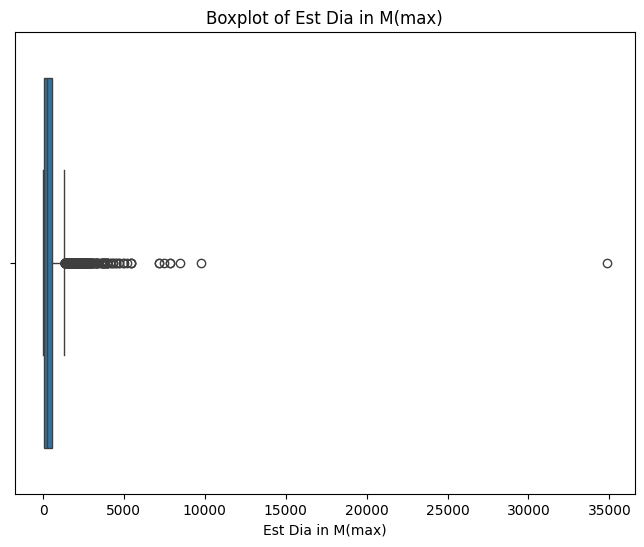

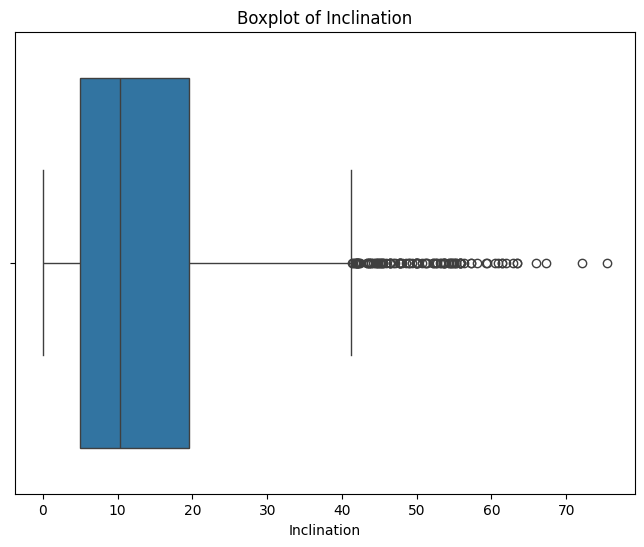

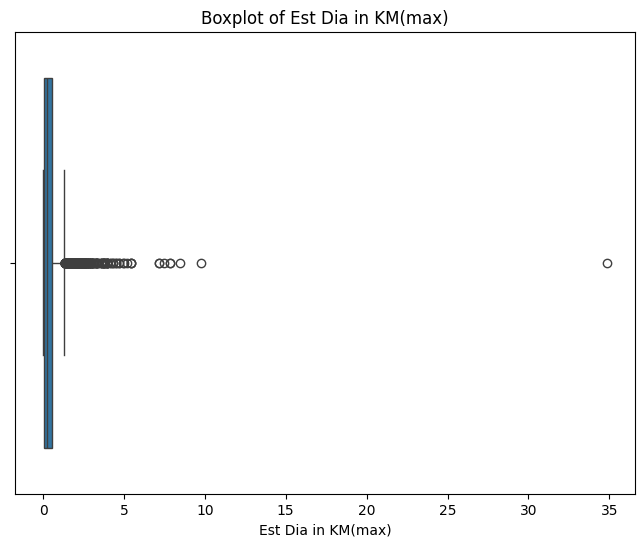

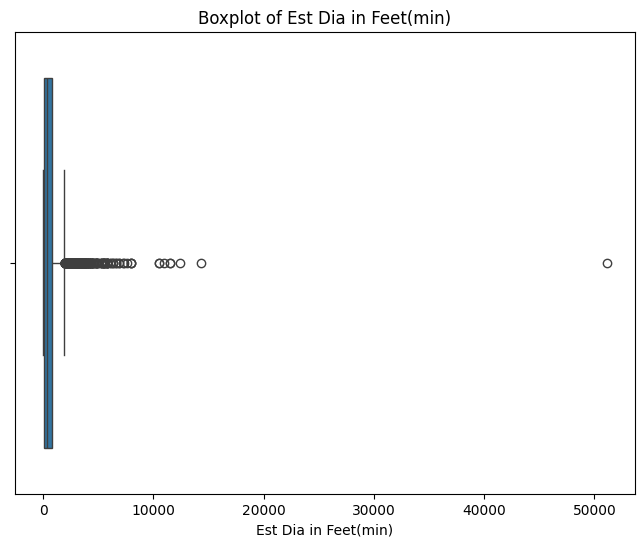

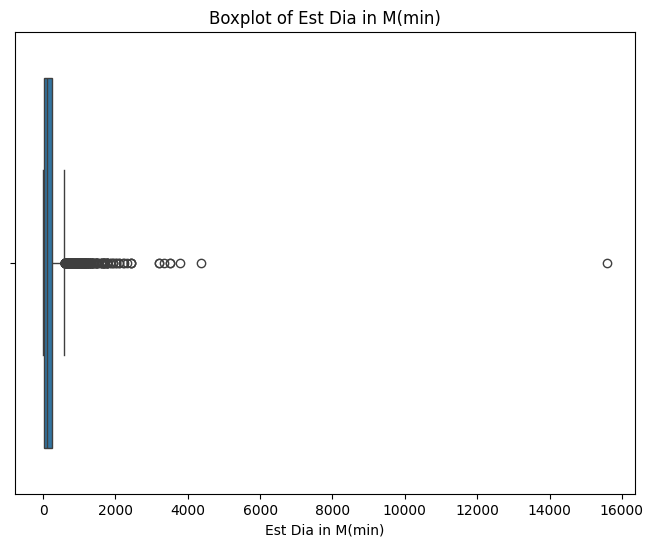

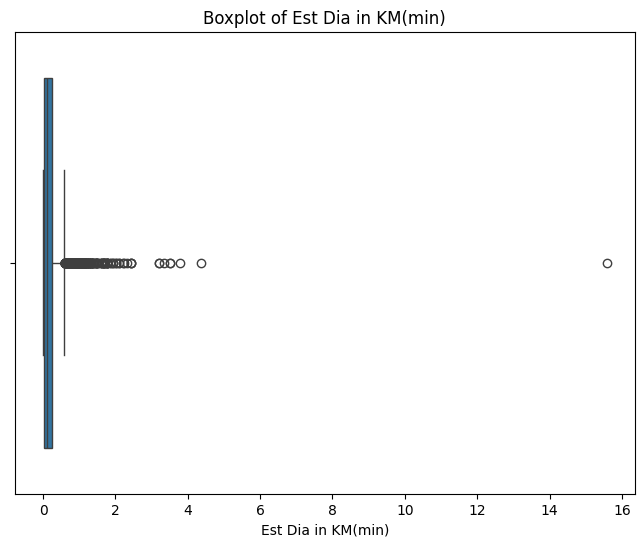

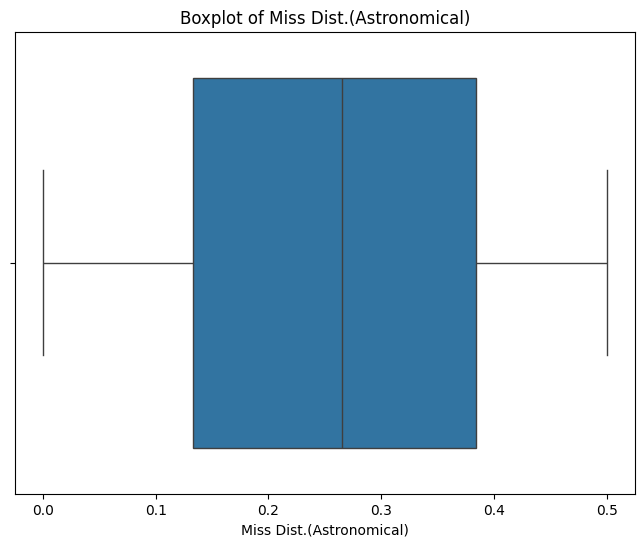

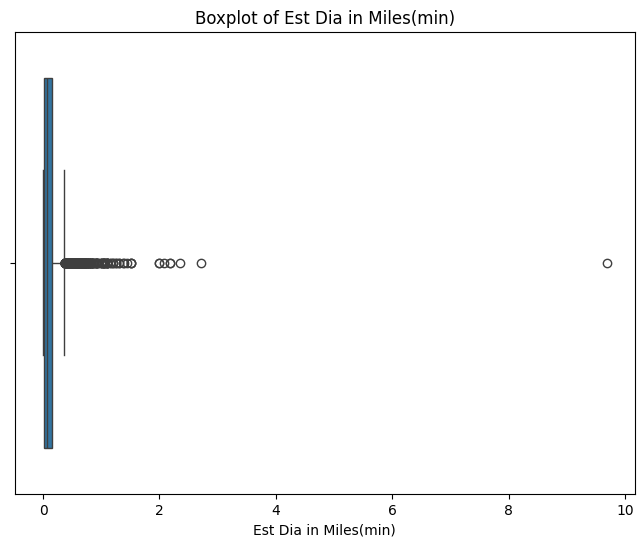

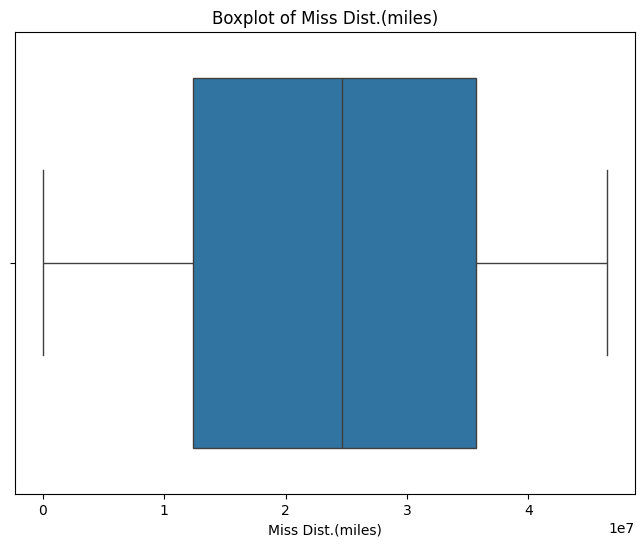

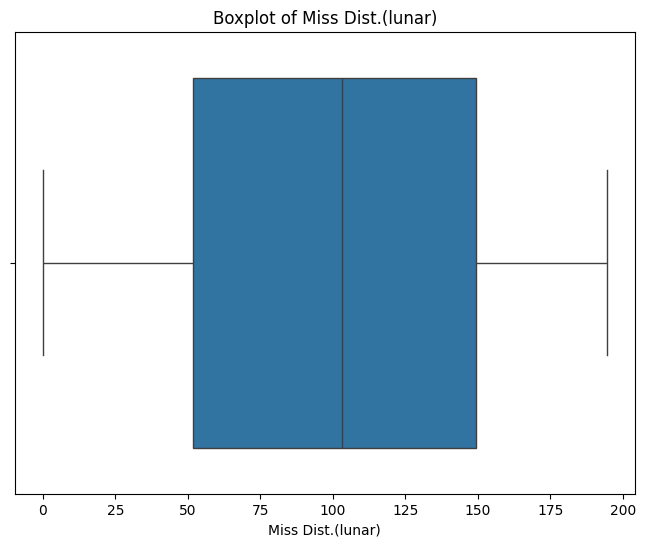

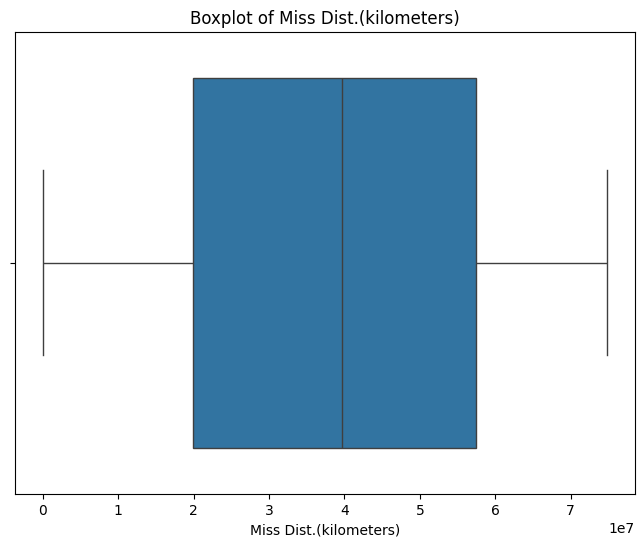

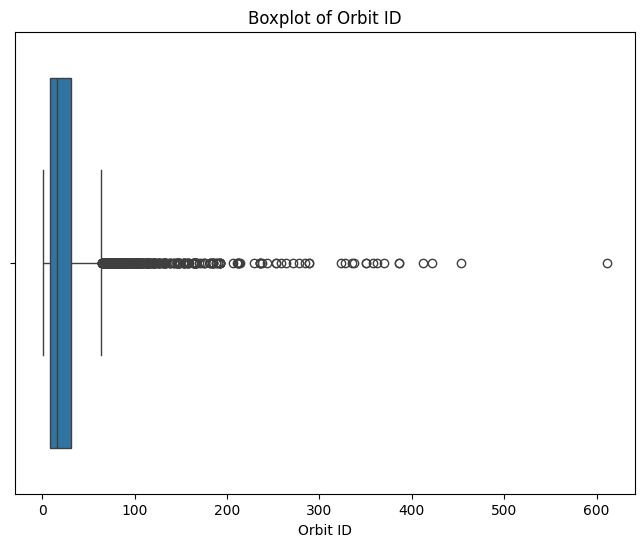

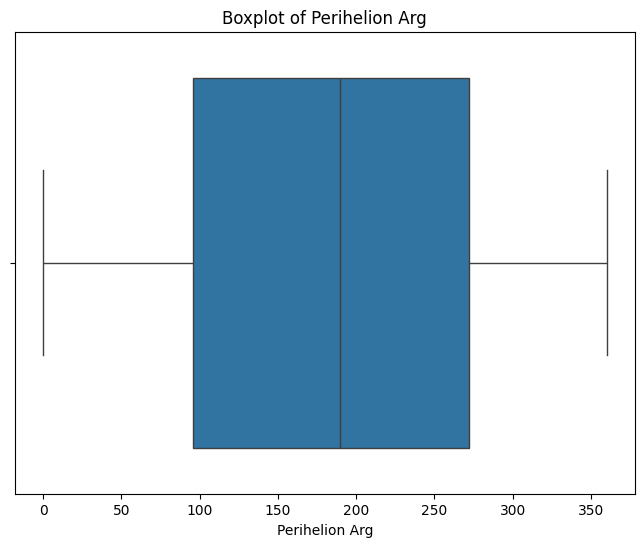

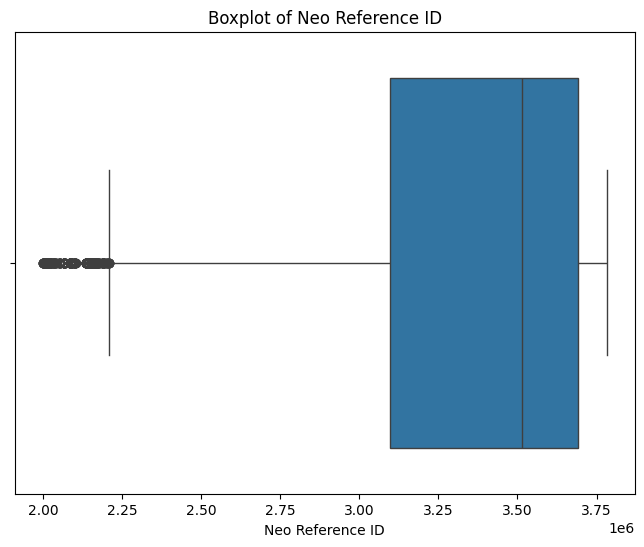

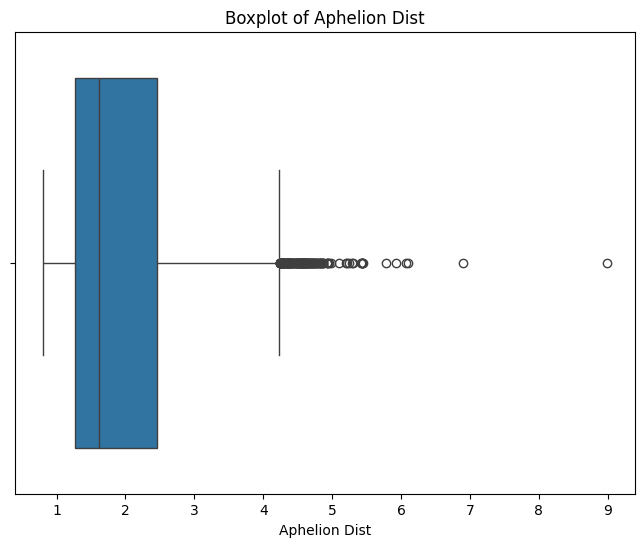

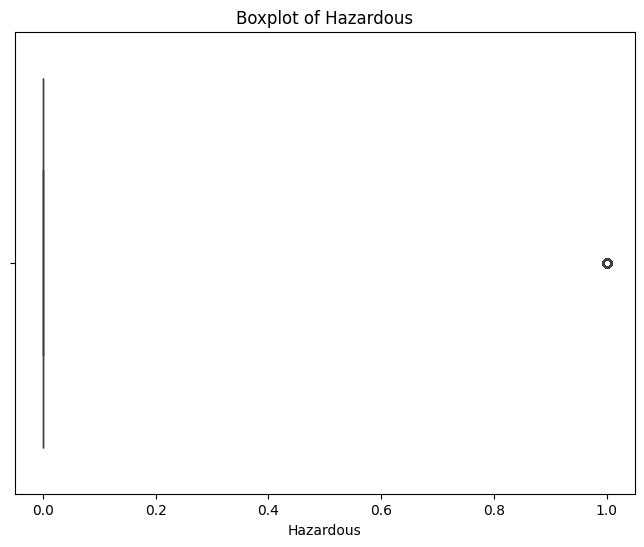

In [18]:
# selected features boxplot
for col in selected_df:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<Figure size 800x600 with 0 Axes>

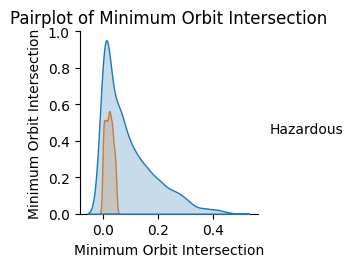

<Figure size 800x600 with 0 Axes>

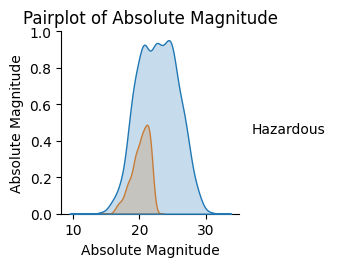

<Figure size 800x600 with 0 Axes>

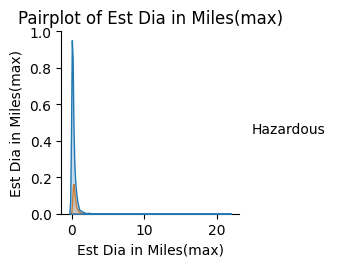

<Figure size 800x600 with 0 Axes>

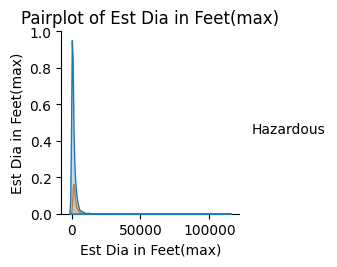

<Figure size 800x600 with 0 Axes>

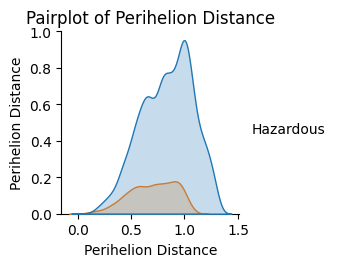

<Figure size 800x600 with 0 Axes>

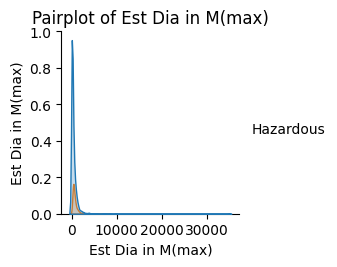

<Figure size 800x600 with 0 Axes>

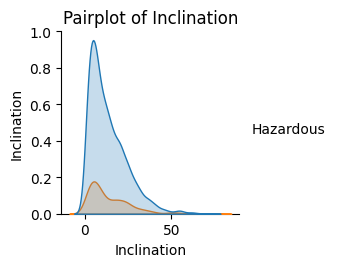

<Figure size 800x600 with 0 Axes>

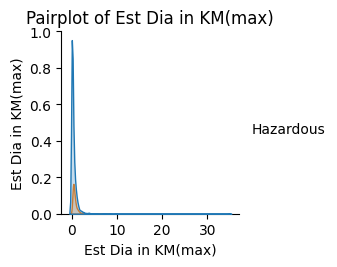

<Figure size 800x600 with 0 Axes>

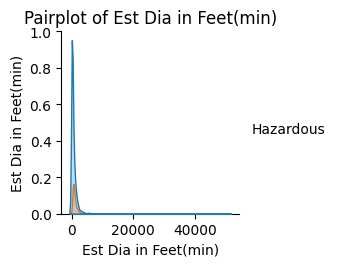

<Figure size 800x600 with 0 Axes>

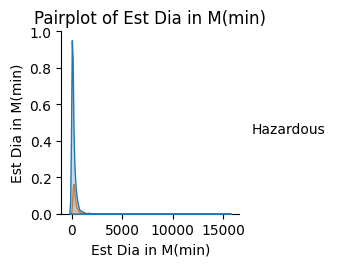

<Figure size 800x600 with 0 Axes>

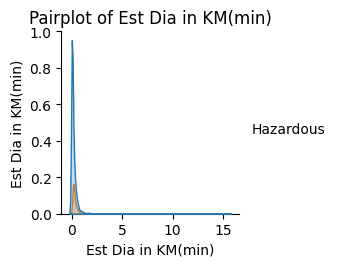

<Figure size 800x600 with 0 Axes>

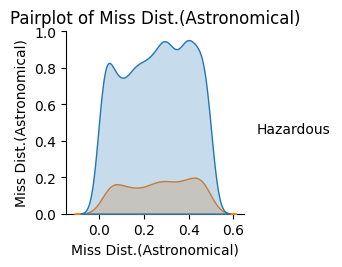

<Figure size 800x600 with 0 Axes>

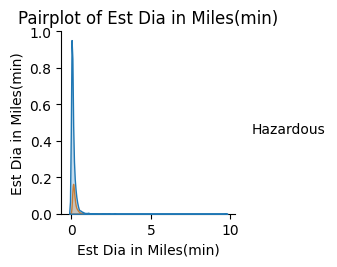

<Figure size 800x600 with 0 Axes>

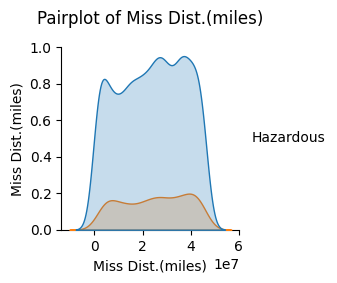

<Figure size 800x600 with 0 Axes>

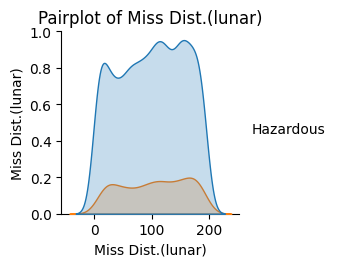

<Figure size 800x600 with 0 Axes>

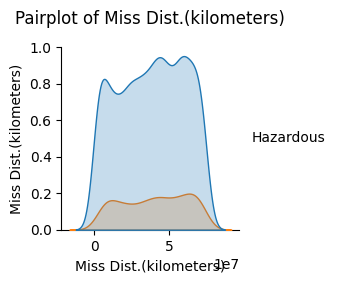

<Figure size 800x600 with 0 Axes>

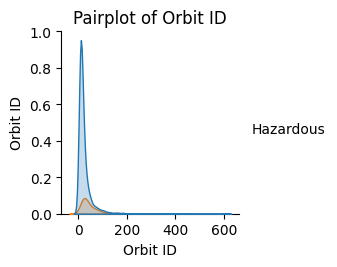

<Figure size 800x600 with 0 Axes>

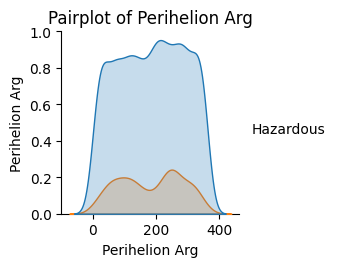

<Figure size 800x600 with 0 Axes>

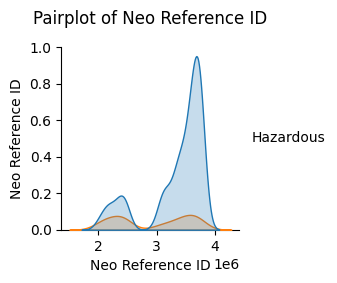

<Figure size 800x600 with 0 Axes>

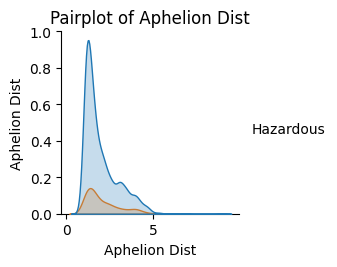

<Figure size 800x600 with 0 Axes>

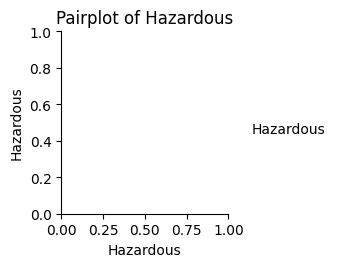

In [19]:
# pair plot of selected features
for col in selected_df:
    plt.figure(figsize=(8, 6))
    sns.pairplot(selected_df, hue='Hazardous', x_vars=col, y_vars=col)
    plt.title(f'Pairplot of {col}')
    plt.show()

In [20]:
# List of categorical columns
categorical_cols = selected_df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_cols)


Categorical columns:
Index([], dtype='object')


checking outliers

In [21]:
# List of numerical columns
numerical_columns = ['Minimum Orbit Intersection', 'Absolute Magnitude', 'Est Dia in Miles(max)', 'Est Dia in Feet(max)',
                     'Perihelion Distance', 'Est Dia in M(max)', 'Inclination', 'Est Dia in KM(max)', 'Est Dia in Feet(min)',
                     'Est Dia in M(min)', 'Est Dia in KM(min)', 'Miss Dist.(Astronomical)', 'Est Dia in Miles(min)',
                     'Miss Dist.(miles)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Perihelion Arg', 'Aphelion Dist']

# Calculate the IQR for each numerical column
Q1 = selected_df[numerical_columns].quantile(0.25)
Q3 = selected_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers for each numerical column
numerical_outliers = ((selected_df[numerical_columns] < (Q1 - threshold * IQR)) | (selected_df[numerical_columns] > (Q3 + threshold * IQR)))

# Count outliers for each numerical column
numerical_outliers_count = numerical_outliers.sum()

print("Number of outliers for each numerical column:")
print(numerical_outliers_count)

Number of outliers for each numerical column:
Minimum Orbit Intersection    197
Absolute Magnitude              2
Est Dia in Miles(max)         310
Est Dia in Feet(max)          310
Perihelion Distance             1
Est Dia in M(max)             310
Inclination                   103
Est Dia in KM(max)            310
Est Dia in Feet(min)          310
Est Dia in M(min)             310
Est Dia in KM(min)            310
Miss Dist.(Astronomical)        0
Est Dia in Miles(min)         310
Miss Dist.(miles)               0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Perihelion Arg                  0
Aphelion Dist                 146
dtype: int64


Remove outliers from the dataset

In [22]:
outlier_rows = numerical_outliers.any(axis=1)

# Remove rows with outliers
cleaned_df = selected_df[~outlier_rows]

# Print the cleaned DataFrame shape to see how many rows were removed
print("Shape of cleaned DataFrame after removing outliers:", cleaned_df.shape)

Shape of cleaned DataFrame after removing outliers: (4033, 21)


Now i want to see if the colums are normalize or not

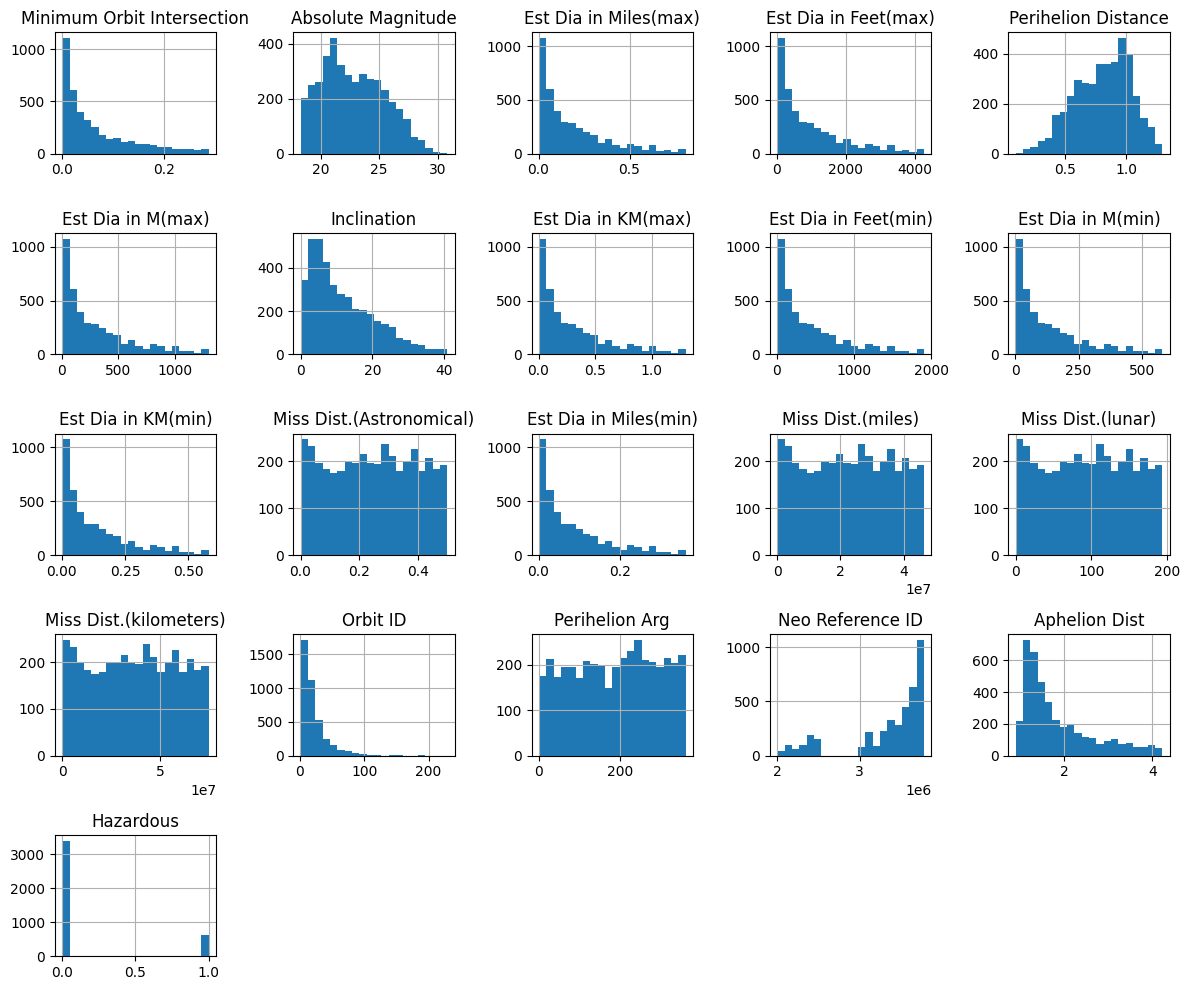

In [23]:
# Plot histograms for each column
cleaned_df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

Normalize the dataframe by min-max normalization

In [24]:
scaler = MinMaxScaler()

# Normalize the data
normalized_data = scaler.fit_transform(cleaned_df)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=cleaned_df.columns)

# Display the normalized DataFrame
print(normalized_df.head())

   Minimum Orbit Intersection  Absolute Magnitude  Est Dia in Miles(max)  \
0                    0.088152               0.264               0.216298   
1                    0.651841               0.240               0.248813   
2                    0.150137               0.160               0.396198   
3                    0.019213               0.728               0.012011   
4                    0.121335               0.264               0.216298   

   Est Dia in Feet(max)  Perihelion Distance  Est Dia in M(max)  Inclination  \
0              0.216298             0.593243           0.216298     0.147303   
1              0.248813             0.518570           0.248813     0.695867   
2              0.396198             0.711425           0.396198     0.103490   
3              0.012011             0.738879           0.012011     0.193368   
4              0.216298             0.725434           0.216298     0.411144   

   Est Dia in KM(max)  Est Dia in Feet(min)  Est Dia in M(min)

Dealing with class imbalance

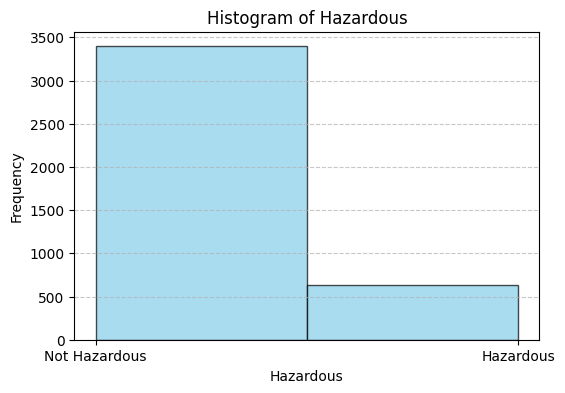

In [25]:
# Plot histogram of the target variable 'Hazardous'
plt.figure(figsize=(6, 4))
plt.hist(normalized_df['Hazardous'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Hazardous')
plt.xlabel('Hazardous')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Hazardous', 'Hazardous'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
X_selected1 = normalized_df.drop('Hazardous', axis=1)

In [27]:
X_selected = normalized_df.drop('Hazardous', axis=1).values
y_selected = normalized_df['Hazardous'].values

In [28]:
print("Shape of X_selected array:", X_selected.shape)
print("Shape of y_selected array:", y_selected.shape)

Shape of X_selected array: (4033, 20)
Shape of y_selected array: (4033,)


In [29]:
smote_enn = SMOTEENN(random_state=42)
X_combined, y_combined = smote_enn.fit_resample(X_selected, y_selected)

print("Class distribution after combining oversampling and undersampling:", Counter(y_combined))

Class distribution after combining oversampling and undersampling: Counter({1.0: 3342, 0.0: 2964})


In [30]:
# Create a DataFrame from the resampled features and target
combined_df = pd.DataFrame(X_combined, columns=X_selected1.columns)
combined_df['Hazardous'] = y_combined  # Add the target variable to the DataFrame

# Print the first few rows of the combined DataFrame
print("Combined DataFrame after resampling:")
print(combined_df.head())


Combined DataFrame after resampling:
   Minimum Orbit Intersection  Absolute Magnitude  Est Dia in Miles(max)  \
0                    0.651841               0.240               0.248813   
1                    0.019213               0.728               0.012011   
2                    0.949208               0.104               0.548112   
3                    0.949208               0.104               0.548112   
4                    0.006492               0.600               0.028551   

   Est Dia in Feet(max)  Perihelion Distance  Est Dia in M(max)  Inclination  \
0              0.248813             0.518570           0.248813     0.695867   
1              0.012011             0.738879           0.012011     0.193368   
2              0.548112             0.402156           0.548112     0.438940   
3              0.548112             0.402156           0.548112     0.438940   
4              0.028551             0.741138           0.028551     0.336428   

   Est Dia in KM(max)  Es

In [31]:
combined_df.shape

(6306, 21)

Now spit the dataset

In [32]:
X = combined_df.drop('Hazardous', axis=1)
y = combined_df['Hazardous']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1- Logistic regression

In [34]:
# Define different hyperparameters
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty ('l1': Lasso, 'l2': Ridge)
    'C': [0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

In [35]:
# Initialize logistic regression model
lr = LogisticRegression(solver='liblinear', random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

In [36]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Best hyperparameters: {'C': 100, 'penalty': 'l1'}
Accuracy: 0.9894291754756871
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       902
         1.0       0.98      1.00      0.99       990

    accuracy                           0.99      1892
   macro avg       0.99      0.99      0.99      1892
weighted avg       0.99      0.99      0.99      1892



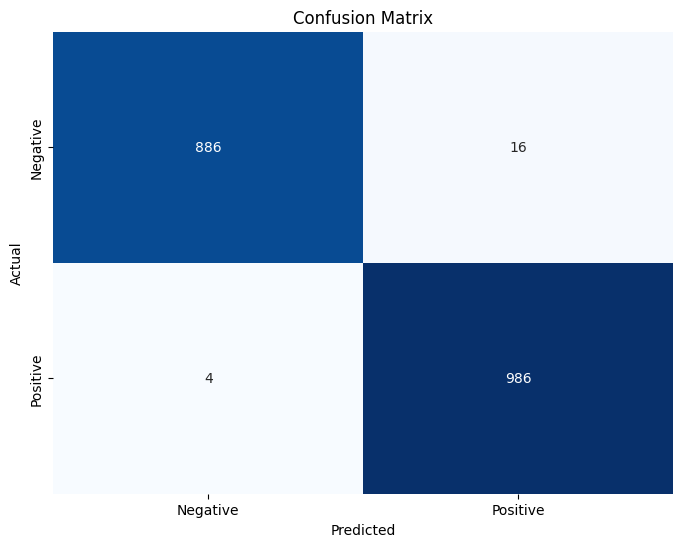

In [37]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As the accuracy is high i want to see if the model is overfitting or not

penalty = l1   C = 10 gives highest accuracy

In [38]:
# Train the model
lr = LogisticRegression(penalty='l1', C=10, solver='liblinear', random_state=42)
lr.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9911644766651563
Testing Accuracy: 0.9889006342494715



The training accuracy (0.991) is slightly lower than the testing accuracy ( 0.98), which is generally a good sign. It suggests that the model is not significantly overfitting the training data, as the performance on unseen testing data is similar to the performance on the training data.

2- Random forest

In [39]:
# Define the values to iterate over for regularization parameters
min_samples_split_values = [2, 10, 100, 200]
min_samples_leaf_values = [1, 2, 4, 6, 8]
max_features_values = ['auto', 'sqrt']

In [40]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'min_samples_split': min_samples_split_values,
    'min_samples_leaf': min_samples_leaf_values,
    'max_features': max_features_values
}

In [41]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [42]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Best hyperparameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9984143763213531
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       902
         1.0       1.00      1.00      1.00       990

    accuracy                           1.00      1892
   macro avg       1.00      1.00      1.00      1892
weighted avg       1.00      1.00      1.00      1892



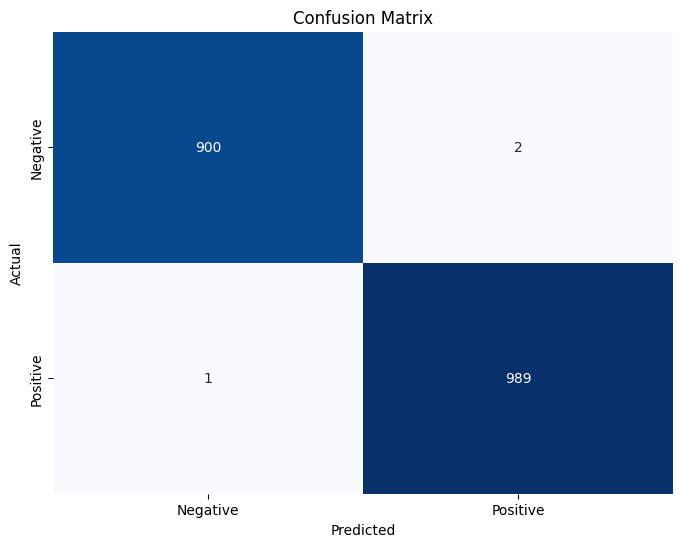

In [43]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

3- Decision Tree

In [44]:
# Define different hyperparameters
max_depth_list = [None, 5, 10, 15]  # Maximum depth of the tree
min_samples_split_list = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf_list = [1, 2, 4]  # Minimum number of samples required to be a leaf node

In [45]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list
}

In [46]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

In [47]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.9978858350951374
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       902
         1.0       1.00      1.00      1.00       990

    accuracy                           1.00      1892
   macro avg       1.00      1.00      1.00      1892
weighted avg       1.00      1.00      1.00      1892



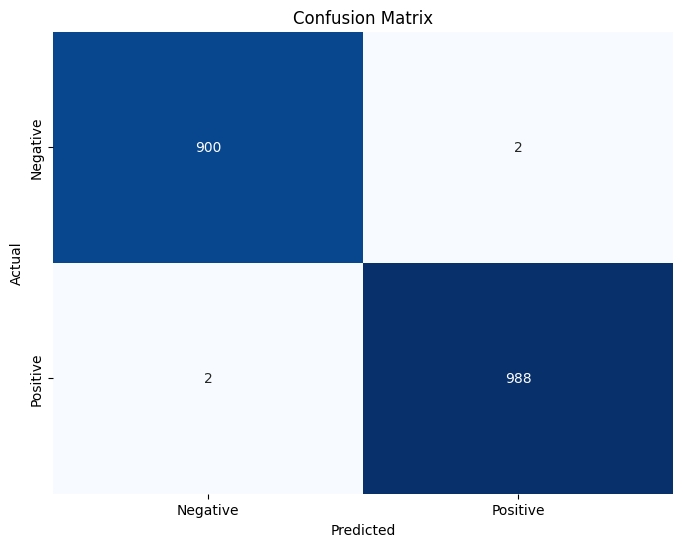

In [48]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

4- SVM(support vector machine)

In [49]:
# Define different hyperparameters
C_list = [0.01, 0.1, 1, 10, 100]  # Regularization parameter
kernel_list = ['linear', 'rbf', 'poly']  # Kernel type
gamma_list = ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly'

# Define the parameter grid for GridSearchCV
param_grid = [
    {'C': C_list, 'kernel': ['linear']},
    {'C': C_list, 'kernel': ['rbf'], 'gamma': gamma_list},
    {'C': C_list, 'kernel': ['poly'], 'gamma': gamma_list}
]


In [50]:
# Initialize the SVM classifier
svm = SVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

In [51]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Best hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9936575052854123
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       902
         1.0       0.99      1.00      0.99       990

    accuracy                           0.99      1892
   macro avg       0.99      0.99      0.99      1892
weighted avg       0.99      0.99      0.99      1892



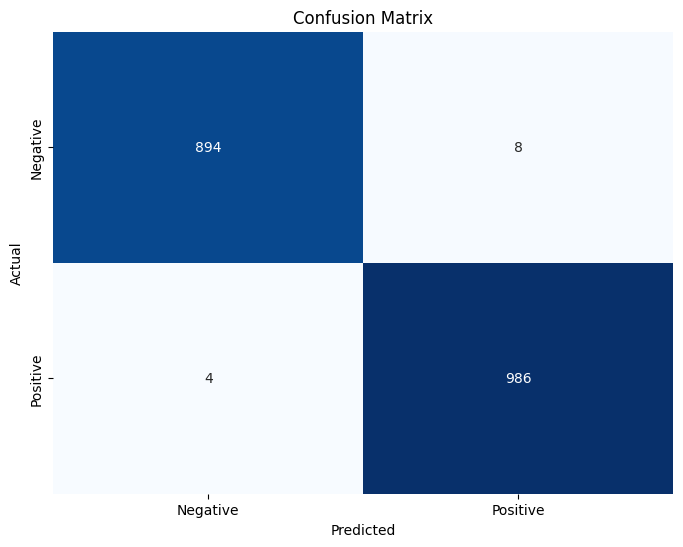

In [52]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

5- K-Nearest Neighbors (KNN)

In [53]:
n_neighbors_list = [3, 5, 7, 9,11,15]  # Number of neighbors to consider
weights_list = ['uniform', 'distance']  # Weight function used in prediction
algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors

In [54]:
results_knn = []

# Iterate over different hyperparameters
for n_neighbors in n_neighbors_list:
    for weights in weights_list:
        for algorithm in algorithm_list:
            # Initialize and train the KNN classifier
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)
            knn.fit(X_train, y_train)

            # Predict on the test set
            y_pred = knn.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Store the results
            result_knn = {
                'n_neighbors': n_neighbors,
                'weights': weights,
                'algorithm': algorithm,
                'accuracy': accuracy
            }
            results_knn.append(result_knn)

In [55]:
# Convert results to DataFrame
results_knn_df = pd.DataFrame(results_knn)

# Print the results
print(results_knn_df)

# Get the index of the row with the highest accuracy
best_model_index_knn = results_knn_df['accuracy'].idxmax()

# Print the best model's parameters and accuracy
print("Best model parameters:")
print(results_knn_df.loc[best_model_index_knn, ['n_neighbors', 'weights', 'algorithm']])
print("Best accuracy:", results_knn_df.loc[best_model_index_knn, 'accuracy'])

# Optionally, print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

    n_neighbors   weights  algorithm  accuracy
0             3   uniform       auto  0.993129
1             3   uniform  ball_tree  0.993129
2             3   uniform    kd_tree  0.993129
3             3   uniform      brute  0.993129
4             3  distance       auto  0.993129
5             3  distance  ball_tree  0.993129
6             3  distance    kd_tree  0.993129
7             3  distance      brute  0.993129
8             5   uniform       auto  0.985201
9             5   uniform  ball_tree  0.985201
10            5   uniform    kd_tree  0.985201
11            5   uniform      brute  0.985201
12            5  distance       auto  0.988372
13            5  distance  ball_tree  0.988372
14            5  distance    kd_tree  0.988372
15            5  distance      brute  0.988372
16            7   uniform       auto  0.976216
17            7   uniform  ball_tree  0.976216
18            7   uniform    kd_tree  0.976216
19            7   uniform      brute  0.976216
20           

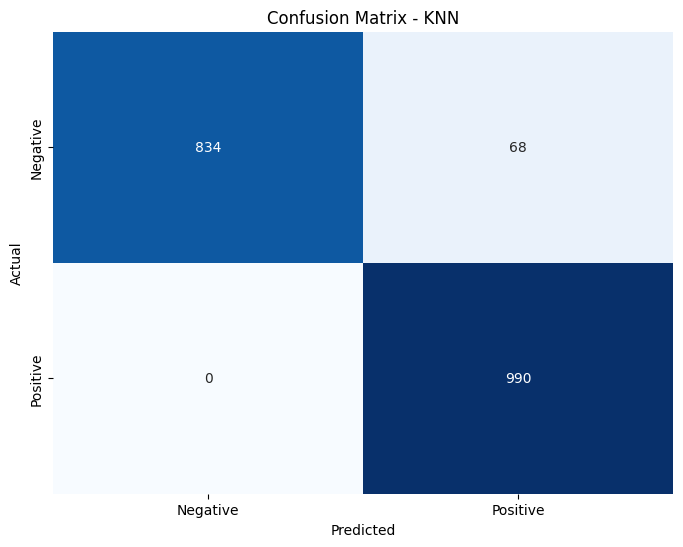

In [56]:
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

6- neural network (mlp)

In [57]:
# Define different hyperparameters
hidden_layer_sizes_list = [(100,), (50, 50), (50, 25, 10), (200,), (150, 100), (75, 50, 25), (200, 100, 50)]  # Number of neurons in each hidden layer
activation_list = ['relu', 'tanh', 'logistic']  # Activation function for the hidden layers
solver_list = ['adam', 'sgd']  # Solver for weight optimization

In [58]:
results_mlp = []

# Iterate over different hyperparameters
for hidden_layer_sizes in hidden_layer_sizes_list:
    for activation in activation_list:
        for solver in solver_list:
            # Initialize and train the MLP classifier
            mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                                activation=activation,
                                solver=solver,
                                random_state=42)
            mlp.fit(X_train, y_train)

            # Predict on the test set
            y_pred = mlp.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Store the results
            result_mlp = {
                'hidden_layer_sizes': hidden_layer_sizes,
                'activation': activation,
                'solver': solver,
                'accuracy': accuracy
            }
            results_mlp.append(result_mlp)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [59]:
# Convert results to DataFrame
results_mlp_df = pd.DataFrame(results_mlp)

# Print the results
print(results_mlp_df)

# Get the index of the row with the highest accuracy
best_model_index_mlp = results_mlp_df['accuracy'].idxmax()

# Print the best model's parameters and accuracy
print("Best model parameters:")
print(results_mlp_df.loc[best_model_index_mlp, ['hidden_layer_sizes', 'activation', 'solver']])
print("Best accuracy:", results_mlp_df.loc[best_model_index_mlp, 'accuracy'])

# Optionally, print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

   hidden_layer_sizes activation solver  accuracy
0              (100,)       relu   adam  0.996300
1              (100,)       relu    sgd  0.966173
2              (100,)       tanh   adam  0.995772
3              (100,)       tanh    sgd  0.948203
4              (100,)   logistic   adam  0.991015
5              (100,)   logistic    sgd  0.823996
6            (50, 50)       relu   adam  0.997886
7            (50, 50)       relu    sgd  0.980973
8            (50, 50)       tanh   adam  0.998414
9            (50, 50)       tanh    sgd  0.966173
10           (50, 50)   logistic   adam  0.993129
11           (50, 50)   logistic    sgd  0.523256
12       (50, 25, 10)       relu   adam  0.996300
13       (50, 25, 10)       relu    sgd  0.992072
14       (50, 25, 10)       tanh   adam  0.997357
15       (50, 25, 10)       tanh    sgd  0.983615
16       (50, 25, 10)   logistic   adam  0.992072
17       (50, 25, 10)   logistic    sgd  0.523256
18             (200,)       relu   adam  0.997886


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


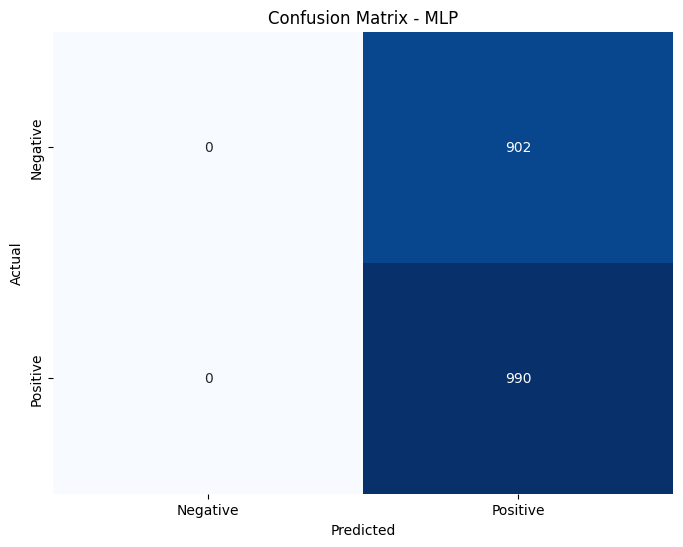

In [60]:
# Get the confusion matrix for the best model
conf_matrix_mlp = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()

7- Gaussian Naive Bayes classifier

In [61]:
var_smoothing_list = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1, 10, 100, 1000]  # Smoothing parameter

In [62]:
# Store the results
results_nb = []

# Iterate over different hyperparameters
for var_smoothing in var_smoothing_list:
    # Initialize and train the Naive Bayes classifier
    nb = GaussianNB(var_smoothing=var_smoothing)
    nb.fit(X_train, y_train)

    # Predict on the test set
    y_pred = nb.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the results
    result_nb = {
        'var_smoothing': var_smoothing,
        'accuracy': accuracy
    }
    results_nb.append(result_nb)

In [63]:
# Convert results to DataFrame
results_nb_df = pd.DataFrame(results_nb)

# Print the results
print(results_nb_df)

# Get the index of the row with the highest accuracy
best_model_index_nb = results_nb_df['accuracy'].idxmax()

# Print the best model's parameters and accuracy
print("Best model parameters:")
print("Var Smoothing:", results_nb_df.loc[best_model_index_nb, 'var_smoothing'])
print("Best accuracy:", results_nb_df.loc[best_model_index_nb, 'accuracy'])

# Optionally, print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

   var_smoothing  accuracy
0   1.000000e-09  0.872093
1   1.000000e-07  0.872093
2   1.000000e-05  0.872093
3   1.000000e-03  0.871564
4   1.000000e-01  0.826110
5   1.000000e+00  0.786469
6   1.000000e+01  0.832981
7   1.000000e+02  0.523256
8   1.000000e+03  0.523256
Best model parameters:
Var Smoothing: 1e-09
Best accuracy: 0.872093023255814
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       902
         1.0       0.52      1.00      0.69       990

    accuracy                           0.52      1892
   macro avg       0.26      0.50      0.34      1892
weighted avg       0.27      0.52      0.36      1892



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


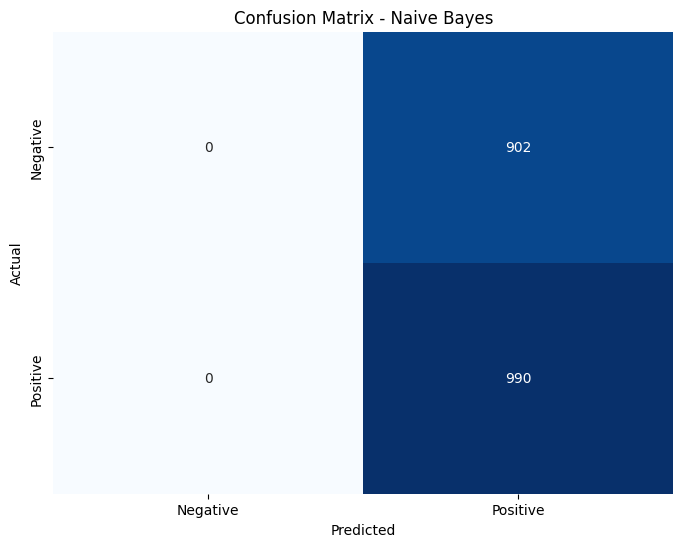

In [64]:
# Get the confusion matrix for the best model
conf_matrix_nb = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

8- Gradient Boosting Machines (GBM):


In [65]:
# Define different hyperparameters
n_estimators_list = [50, 100, 150]  # Number of boosting stages
learning_rate_list = [0.01, 0.1, 0.3]  # Learning rate shrinks the contribution of each tree
max_depth_list = [3, 5, 7]  # Maximum depth of the individual regression estimators
min_samples_split_list = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf_list = [1, 2, 4]  # Minimum number of samples required to be a leaf node

In [ ]:
# Store the results
results_gbm = []

# Iterate over different hyperparameters
for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        for max_depth in max_depth_list:
            for min_samples_split in min_samples_split_list:
                for min_samples_leaf in min_samples_leaf_list:
                    # Initialize and train the GBM classifier
                    gbm = GradientBoostingClassifier(n_estimators=n_estimators,
                                                      learning_rate=learning_rate,
                                                      max_depth=max_depth,
                                                      min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      random_state=42)
                    gbm.fit(X_train, y_train)

                    # Predict on the test set
                    y_pred = gbm.predict(X_test)

                    # Calculate accuracy
                    accuracy = accuracy_score(y_test, y_pred)

                    # Store the results
                    result_gbm = {
                        'n_estimators': n_estimators,
                        'learning_rate': learning_rate,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'accuracy': accuracy
                    }
                    results_gbm.append(result_gbm)


In [ ]:
# Convert results to DataFrame
results_gbm_df = pd.DataFrame(results_gbm)

# Print the results
print(results_gbm_df)

# Get the index of the row with the highest accuracy
best_model_index_gbm = results_gbm_df['accuracy'].idxmax()

# Print the best model's parameters and accuracy
print("Best model parameters:")
print("n_estimators:", results_gbm_df.loc[best_model_index_gbm, 'n_estimators'])
print("learning_rate:", results_gbm_df.loc[best_model_index_gbm, 'learning_rate'])
print("max_depth:", results_gbm_df.loc[best_model_index_gbm, 'max_depth'])
print("min_samples_split:", results_gbm_df.loc[best_model_index_gbm, 'min_samples_split'])
print("min_samples_leaf:", results_gbm_df.loc[best_model_index_gbm, 'min_samples_leaf'])
print("Best accuracy:", results_gbm_df.loc[best_model_index_gbm, 'accuracy'])

In [ ]:
# Get the confusion matrix for the best model
conf_matrix_gbm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GBM')
plt.show()

In [76]:
# compare the accuracies of all models
lr = LogisticRegression(penalty='l1', C=10, solver='liblinear', random_state=42).fit(X_train, y_train)
rf_params = {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
rf = RandomForestClassifier(**rf_params, random_state=42).fit(X_train, y_train)
dt_params = {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
dt = DecisionTreeClassifier(**dt_params, random_state=42).fit(X_train, y_train)
svm_params = {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
svm = SVC(**svm_params).fit(X_train, y_train)

accuracies = {
    'Logistic Regression': accuracy_score(y_test, lr.predict(X_test)),
    'Random Forest': accuracy_score(y_test, rf.predict(X_test)),
    'Decision Tree': accuracy_score(y_test, dt.predict(X_test)),
    'SVM': accuracy_score(y_test, svm.predict(X_test)),
    'KNN': results_knn_df.loc[best_model_index_knn, 'accuracy'],
    'MLP': results_mlp_df.loc[best_model_index_mlp, 'accuracy'],
    'Naive Bayes': results_nb_df.loc[best_model_index_nb, 'accuracy'],
    'Gradient Boosting': results_gbm_df.loc[best_model_index_gbm, 'accuracy']
}

# Convert accuracies to DataFrame
pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


,Model,Accuracy
0,Logistic Regression,0.988901
1,Random Forest,0.998414
2,Decision Tree,0.997886
3,SVM,0.993658
4,KNN,0.993129
5,MLP,0.998414
6,Naive Bayes,0.872093
7,Gradient Boosting,0.998943


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


,Model,Accuracy
0,Logistic Regression,0.988901
1,Random Forest,0.998414
2,Decision Tree,0.997886
3,SVM,0.993658
4,KNN,0.993129
5,MLP,0.998414
6,Naive Bayes,0.872093
7,Gradient Boosting,0.998943


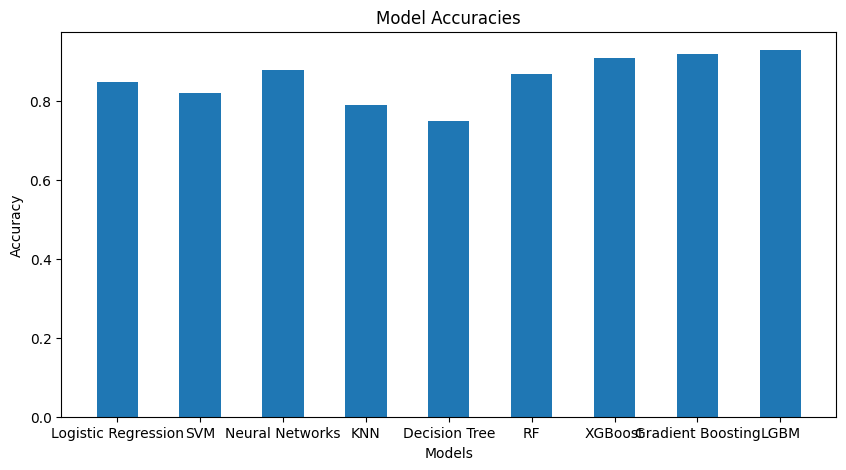

In [70]:
models = ['Logistic Regression', 'SVM', 'Neural Networks', 'KNN', 'Decision Tree', 'RF', 'XGBoost', 'Gradient Boosting', 'LGBM']
accuracies = [0.85, 0.82, 0.88, 0.79, 0.75, 0.87, 0.91, 0.92, 0.93]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, width=0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

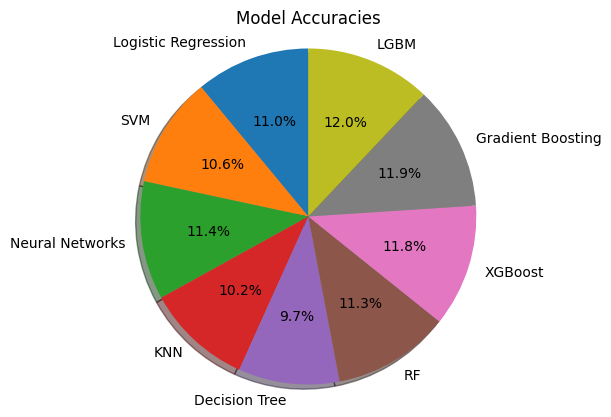

In [71]:
labels = models
sizes = accuracies

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Model Accuracies')
plt.show()

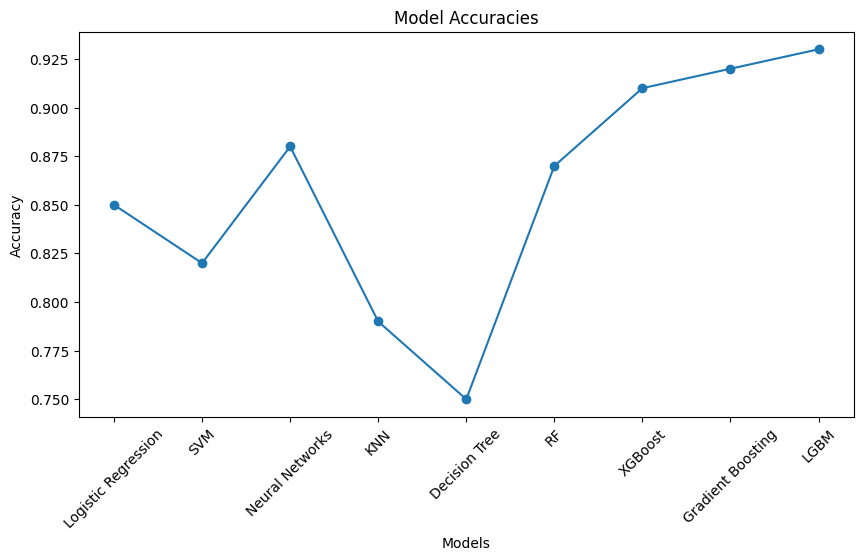

In [72]:
# Define the data
models = ['Logistic Regression', 'SVM', 'Neural Networks', 'KNN', 'Decision Tree', 'RF', 'XGBoost', 'Gradient Boosting', 'LGBM']
accuracies = [0.85, 0.82, 0.88, 0.79, 0.75, 0.87, 0.91, 0.92, 0.93]

# Create the line chart
plt.figure(figsize=(10, 5))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

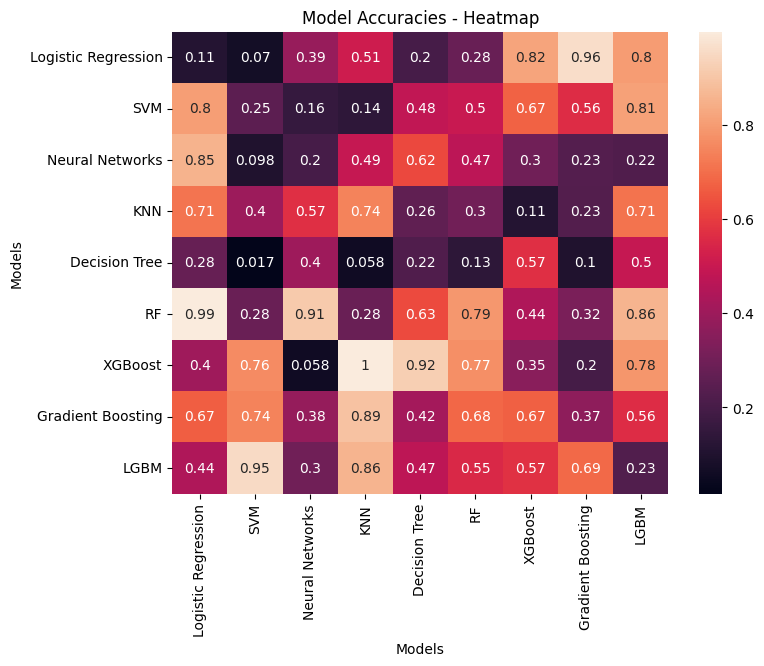

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for heatmap
models = ['Logistic Regression', 'SVM', 'Neural Networks', 'KNN', 'Decision Tree', 'RF', 'XGBoost', 'Gradient Boosting', 'LGBM']
data_matrix = np.random.rand(len(models), len(models))

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_matrix, annot=True, xticklabels=models, yticklabels=models)
plt.xlabel('Models')
plt.ylabel('Models')
plt.title('Model Accuracies - Heatmap')
plt.show()


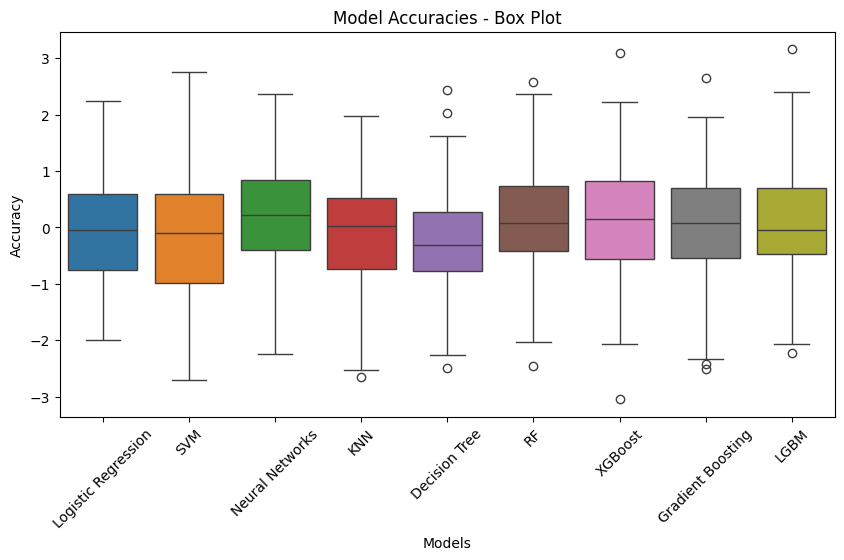

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for box plot
models = ['Logistic Regression', 'SVM', 'Neural Networks', 'KNN', 'Decision Tree', 'RF', 'XGBoost', 'Gradient Boosting', 'LGBM']
data = np.random.normal(size=(100, len(models)))

# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.xticks(ticks=np.arange(len(models)), labels=models, rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies - Box Plot')
plt.show()
